In [24]:
import pandas as pd
import numpy as np 
from sklearn import svm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore")


In [25]:
data=pd.read_csv("toxic_dataset.csv")
data.head(20)
data.isnull().sum()
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Text(0.5, 1.0, 'graph for show the distribution of classes(Toxic column )')

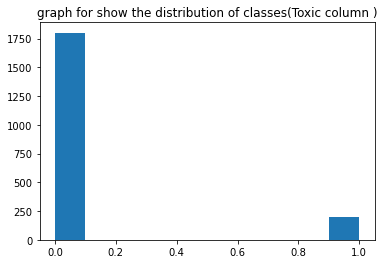

In [26]:
#plot to test whether this is an imbalanced dataset
plt.hist(data["toxic"])
plt.title("graph for show the distribution of classes(Toxic column )")

In [27]:
#filtering columns
new_data=data[["comment_text","toxic"]]

new_data["comment_text"]=new_data["comment_text"].str.lower()
new_data.head()

,comment_text,toxic
0,explanation\nwhy the edits made under my usern...,0
1,d'aww! he matches this background colour i'm s...,0
2,"hey man, i'm really not trying to edit war. it...",0
3,"""\nmore\ni can't make any real suggestions on ...",0
4,"you, sir, are my hero. any chance you remember...",0


In [28]:


#applying tokenization for the x_features
tokenizer = RegexpTokenizer("[\w']+")
new_data["comment_text"]=new_data["comment_text"].map(tokenizer.tokenize)


new_data.head(5)

,comment_text,toxic
0,"[explanation, why, the, edits, made, under, my...",0
1,"[d'aww, he, matches, this, background, colour,...",0
2,"[hey, man, i'm, really, not, trying, to, edit,...",0
3,"[more, i, can't, make, any, real, suggestions,...",0
4,"[you, sir, are, my, hero, any, chance, you, re...",0


In [29]:
x=new_data["comment_text"].astype(str)
#applying tfTfidfVectorizer transformation
y=new_data["toxic"]
vectrizer = TfidfVectorizer(analyzer='word',ngram_range=(1,3))
x=vectrizer.fit_transform(x)



In [30]:
#transforming the imbalanced data to balanced
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [32]:
model=svm.SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
model.score(x_test,y_test)

0.9950027762354248

In [34]:
pred=model.predict(x_test)
print(pred)

[1 1 1 ... 0 1 0]
